In [1]:
# install the required packages 
import pandas as pd
import numpy as np
import requests 
import tweepy
import json
import matplotlib.pyplot as plt

# Data Wrangling

# Gathering Data

In [2]:
# Read "twitter-archive-enhanced.csv" file and save it as df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# get "image_predictions.tsv" file using requestes package
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
open('image-predictions.tsv', 'wb').write(response.content)



335079

In [4]:
# Read "image-predictions.tsv" file and save it as df2   
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
# copied from twitter _api.py
from tweepy import OAuthHandler
from timeit import default_timer as timer 
    
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '*****'
consumer_secret = '********'
access_token = '********'
access_secret = '********'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify = True)

In [19]:

tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 731
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Succe

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [13]:
# save json file as dataframe
df3 = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')


# Assessing Data

In [6]:
# get info about the first data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# view the first 50 rows in the first data frame
df1.head( 50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# get statistic descriptive about df1
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## observations about df1(twitter-archive-enhanced.csv)
- This data frame contains 2356 rows. Each row reresents a tweet. There are 6 columns that contain null values: in_reply_to_status_id, in_reply_to_user_id ,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.
- Null values in the first 5 columns are not a problem since they should be null if the tweet is not a retweet or a reply to another tweet. However, retweets can not be counted in rating and these rows should be eliminated 
- Regarding expanded_urls column, null values here is a problem. However, this url might be not be needed in data analysis, so it can be ignored 
- the Denominator should be 10, yet the min value is 6.7 and max value is 170. These rows must be identified and cleaned. 
- dog stage (doggo, floofer, pupper, puppo) should be one column since the dog can only be at one stage.
- some dogs are not associated with any stage and some do not have names
- in_reply_to_status_id, in_reply_to_user_id ,retweeted_status_id, retweeted_status_user_id are all of float datatype, where they should be integer. Timestamp column should be date & time datatype. However, we do not need to fix all theses variables if they are not used in analysis
- text column does not appear fully

In [16]:
# get the rows where dogs do not have names 
df1.loc[df1['name'] == 'None']

# get the number of rows where dogs do not have names 
df1.loc[df1['name'] == 'None'].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

745 rows for dogs without names. I noticed that for some rows, the name is mentioned in the tweet text and can be extracted 

In [9]:
# get list of unique names
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

some dogs' names start with lower case letter 

In [10]:
# get the rows where dogs do not have stage
df1.loc[(df1['doggo'] == 'None') & (df1['floofer'] == 'None')& (df1['pupper'] == 'None') & (df1['puppo'] == 'None')]

# get the number of rows where dogs do not have stage
df1.loc[(df1['doggo'] == 'None') & (df1['floofer'] == 'None')& (df1['pupper'] == 'None') & (df1['puppo'] == 'None')].count()


tweet_id                      1976
in_reply_to_status_id           70
in_reply_to_user_id             70
timestamp                     1976
source                        1976
text                          1976
retweeted_status_id            145
retweeted_status_user_id       145
retweeted_status_timestamp     145
expanded_urls                 1923
rating_numerator              1976
rating_denominator            1976
name                          1976
doggo                         1976
floofer                       1976
pupper                        1976
puppo                         1976
dtype: int64

1976 rows for dogs without stage. 

In [50]:
# get rows where rating_denominator does not equal 10
df_not10= df1.loc[df1['rating_denominator'] != 10]

# get the number of rows here rating_denominator does not equal 10
len(df_not10)

23

23 rows have rating_denominator rather than 10. This must be fixed in order to compare rating fairly 

In [65]:
# get rows where a dog is associated with more than one stage (doggo & floofer)
df1.loc[(df1['doggo'] == 'doggo') & (df1['floofer'] == 'floofer')]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",None,doggo,floofer,None,None,1.1


In [55]:
# get rows where a dog is associated with more than one stage (doggo & pupper)
df1.loc[(df1['doggo'] == 'doggo')& (df1['pupper'] == 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [56]:
# get rows where a dog is associated with more than one stage (doggo & puppo)
df1.loc[(df1['doggo'] == 'doggo')& (df1['puppo'] == 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [58]:
# get rows where a dog is associated with more than one stage
# no rows found for the following combinations 

df1.loc[(df1['floofer'] == 'floofer') & (df1['puppo'] == 'puppo')]
df1.loc[(df1['floofer'] == 'floofer') & (df1['pupper'] == 'pupper')]
df1.loc[(df1['puppo'] == 'puppo') & (df1['pupper'] == 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
# get info about the second data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# view the first 50 rows in the second data frame
df2.head( 50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
# get statistic descriptive about df2
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## observations about df2 (Image Predictions )
- This data frame contains 2075 rows
- There are 12 columns and none of them contain null values 
- Each row represents a tweet. Therefore, this dataframe should be merged with the first one. However, the first dataframe has records of 2356 tweets while this one has only 2075 tweets, which means some tweets will be without images and should be eliminated after merging.



In [17]:
# get info about the third dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [14]:
# view the first 50 rows in the third dataframe
df3.head( 50)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37982,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8298,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32609,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6126,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24557,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4056,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41311,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8438,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39504,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9138,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19851,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3042,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11599,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2013,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",64059,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18402,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27263,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4176,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31285,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7198,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
# get statistic descriptive about df3
df3.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2340.000000,0.0,2.340000e+03,2.340000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2205.0,2205.0,2.600000e+01,2.600000e+01,2340.000000
mean,NaN,NaN,7947.652564,NaN,7.422176e+17,7.422176e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2921.361538
std,NaN,NaN,12310.103793,NaN,6.832564e+16,6.832564e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4921.437875
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1372.500000,NaN,6.783394e+17,6.783394e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,586.500000
50%,NaN,NaN,3454.500000,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1363.500000
75%,NaN,NaN,9723.500000,NaN,7.986954e+17,7.986954e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3402.250000
max,NaN,NaN,163968.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,83410.000000


## observations about df3 ( tweet json )

- There are 32 columns and most of them are not important for the analysis and should be eliminated 
- Each row represents a tweet. Therefore, this dataframe should be merged with the first and second ones. However, the first dataframe has records of 2356 tweets while the second one has only 2075 tweets and the third one has 2340 tweets, which means some tweets will be eliminated after merging.

## Quality issues
1- Timestamp column should be date & time datatype. 

2- the Denominator should be 10, yet the min value is 6.7 and max value is 170. These rows must be identified and cleaned. 

3- since Denominator is not always 10, new coulmn "rating" should be added for fair comparison 

4-  some dogs are not associated with any stage and some do not have names 

5-  some dogs are associated with more than one stage

6-  new col satge should be category  

7-  p1, p2, p3 should be categories 

8- p1, p2, p3 values should be in lower case 



## Tidiness issues
1- dog stage in the first dataframe (doggo, floofer, pupper, puppo) should be one column since the dog can only be at one stage.

2- There are some tweets that contain rating for two dogs. Each row should represents a tweet that includes one dog rating

3- all the three dataframes represent tweets, therefore they should be combined in one dataframe after eliminating unwanted columns 

In [6]:
# copy the first dataframe
df1=df1.copy()

In [9]:
# copy the second dataframe
df2=df2.copy()

In [15]:
# copy the third dataframe
df3= df3.copy()

# Cleaning Data

**1) define:** change Timestamp column to date & time datatype.

**code**

In [7]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

**test** 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

**2) define:** fix numerator & denominator values where rating_denominator does not equal 10

**code** 

In [9]:
# get rows where rating_denominator does not equal 10
df_not10= df1.loc[df1['rating_denominator'] != 10]

In [10]:
df_not10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [11]:
# expand the text column to look for the correct numbers in the text 
pd.set_option('display.max_colwidth', -1)

# source: https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin

In [12]:
# update record 313 with the correct ratign 13 out of 10 as shown in the text
df1.loc[313,'rating_numerator'] = 13
df1.loc[313,'rating_denominator'] = 10

In [13]:
# update record 784 with the correct ratign 14 out of 10 as shown in the text
df1.loc[784,'rating_numerator'] = 14
df1.loc[784,'rating_denominator'] = 10

In [14]:
# update record 1068 with the correct ratign 14 out of 10 as shown in the text
df1.loc[1068,'rating_numerator'] = 14
df1.loc[1068 ,'rating_denominator'] = 10

In [15]:
# update record 1202 with the correct ratign 11 out of 10 as shown in the text
df1.loc[1202,'rating_numerator'] = 11
df1.loc[1202 ,'rating_denominator'] = 10

In [16]:
#  update record 1165 with the correct ratign 13 out of 10 as shown in the text
df1.loc[1165,'rating_numerator'] = 13
df1.loc[1165 ,'rating_denominator'] = 10

In [17]:
#  update record 1662 with the correct ratign 10 out of 10 as shown in the text
df1.loc[1662,'rating_numerator'] = 10
df1.loc[1662 ,'rating_denominator'] = 10

In [18]:
# update record 2335 with the correct ratign 9out of 10 as shown in the text
df1.loc[2335,'rating_numerator'] = 9
df1.loc[2335,'rating_denominator'] = 10

In [19]:
# delete row with tweet id 686035780142297088 because the text shows that it is just a reply to a rating
df1= df1[df1.tweet_id != 686035780142297088]


In [20]:
# delete row with tweet id 832088576586297345 because the text shows that rating is wrong and 11/15 is actually the account start date
df1= df1[df1.tweet_id != 832088576586297345]


In [21]:
# delete row with tweet id 682808988178739200 because the text shows that it is just a reply to a rating
df1= df1[df1.tweet_id != 682808988178739200]

rows number 433, 516,902, 1120,1228,1254,1274,1351,1433,1634,1635,1779,1843 contain correct rating, therefore I did not change the rating_denominator

**test**

In [22]:
# only 13 rows that mentioned above have rating_denominator != 10
df1.loc[df1['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitt

**3) define:** add new column to calculate rating, which solves the issue with different denominator 

**code**

In [23]:
# add new column to calculate rating
df1['rating'] = df1['rating_numerator']/df1['rating_denominator']

**test**

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2353 non-null int64
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
timestamp                     2353 non-null datetime64[ns]
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2353 non-null int64
rating_denominator            2353 non-null int64
name                          2353 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
rating                  

**4) define:** delete rows where dogs are not associated with any stage (not accomplished)

In [25]:
# get the rows where dogs do not have stage
df_no_stage= df1.loc[(df1['doggo'] == 'None') & (df1['floofer'] == 'None')& (df1['pupper'] == 'None') & (df1['puppo'] == 'None')]


In [26]:
# 1973 rows without stage, since the number is big, it is not wise to delete them. 
len(df_no_stage)

1973

In [27]:
# get the rows where dogs do not have names
df1.loc[(df1['name'] == 'None')]
# 742 rows for dogs without names, so looking for the name in text is not practical 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,1.3
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo,1.3
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None,1.3
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None,1.2
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,1.2
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None,1.2
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None,1.4
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None,1.3
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter

**5) define:** delete unwanted columns from the first dataframe 

**code**

In [28]:
# drop 7 columns 
df1= df1.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','rating_numerator','rating_denominator',], axis=1)


**test**

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2353 non-null int64
timestamp        2353 non-null datetime64[ns]
source           2353 non-null object
text             2353 non-null object
expanded_urls    2297 non-null object
name             2353 non-null object
doggo            2353 non-null object
floofer          2353 non-null object
pupper           2353 non-null object
puppo            2353 non-null object
rating           2353 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 220.6+ KB


**6) define:** fix rows where a dog is associated with many stages 

**code**

In [30]:
# get rows where a dog is associated with more than one stage (doggo & puppo)
df1.loc[(df1['doggo'] == 'doggo')& (df1['puppo'] == 'puppo')]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,None,doggo,None,None,puppo,1.3


In [31]:
# according to the text, the dog in tweet 855851453814013952 is puppo not doggo
df1.loc[df1.tweet_id == 855851453814013952, 'doggo'] = "None"

In [32]:
# get rows where a dog is associated with more than one stage (doggo & floofer)
df1.loc[(df1['doggo'] == 'doggo') & (df1['floofer'] == 'floofer')]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",None,doggo,floofer,None,None,1.1


In [33]:
# according to the text, the dog in tweet 8854010172552949760 is floofer not doggo
df1.loc[df1.tweet_id == 854010172552949760, 'doggo'] = "None"

In [34]:
# get rows where a dog is associated with more than one stage (doggo & pupper)
df1.loc[(df1['doggo'] == 'doggo')& (df1['pupper'] == 'pupper')]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,Dido,doggo,None,pupper,None,1.3
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,None,doggo,None,pupper,None,1.2
565,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,None,doggo,None,pupper,None,1.1
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",Bones,doggo,None,pupper,None,1.2
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",Pinot,doggo,None,pupper,None,1.0
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,None,doggo,None,pupper,None,1.2
778,775898661951791106,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda","https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",None,doggo,None,pupper,None,1.2
822,770093767776997377,2016-08-29 03:00:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",just,doggo,None,pupper,None,1.2
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",Maggie,doggo,None,pupper,None,1.2
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,None,doggo,None,pupper,None,0.5


In [35]:
# according to the text, the dog in tweet 8817777686764523521 is Pupper not doggo
df1.loc[df1.tweet_id == 817777686764523521, 'doggo'] = "None"

In [36]:
# according to the text, the dog in tweet 801115127852503040 is Pupper not doggo
df1.loc[df1.tweet_id == 801115127852503040, 'doggo'] = "None"

In [37]:
# according to the text, the dog in tweet 785639753186217984 is doggo
df1.loc[df1.tweet_id == 785639753186217984, 'pupper'] = "None"


In [38]:
# according to the text, the dog in tweet 751583847268179968 has no stage
df1.loc[df1.tweet_id == 751583847268179968 , 'pupper'] = "None"
df1.loc[df1.tweet_id == 751583847268179968 , 'doggo'] = "None"

In [39]:
# according to the text, the rating in the six tweets below is for two dogs. I decided to delete these rows 
df1=df1[df1.tweet_id != 808106460588765185]


In [40]:
df1=df1[df1.tweet_id != 775898661951791106]


In [41]:
df1=df1[df1.tweet_id != 770093767776997377]


In [42]:
df1=df1[df1.tweet_id != 759793422261743616]

In [43]:
df1=df1[df1.tweet_id != 741067306818797568]

In [44]:
df1=df1[df1.tweet_id != 33109485275860992]

In [45]:
df1=df1[df1.tweet_id != 802265048156610565]

In [46]:
df1=df1[df1.tweet_id != 781308096455073793]

In [47]:
df1=df1[df1.tweet_id != 733109485275860992]

**test**

In [48]:
# get rows where a dog is associated with more than one stage (doggo & puppo)
df1.loc[(df1['doggo'] == 'doggo')& (df1['puppo'] == 'puppo')]
# no records

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating


In [49]:
# get rows where a dog is associated with more than one stage (doggo & floofer)
df1.loc[(df1['doggo'] == 'doggo') & (df1['floofer'] == 'floofer')]
# no records

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating


In [50]:
# get rows where a dog is associated with more than one stage (doggo & pupper)
df1.loc[(df1['doggo'] == 'doggo')& (df1['pupper'] == 'pupper')]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating


**7) define:** add new column stage and delete 4 columns (doggo, floofer, pupper, puppo)

**code**

In [51]:
# define function that reads the stage from all 4 columns and return their value as stage 
def stage (row):
   if row['doggo'] == 'doggo':
      return 'doggo'
   if row['floofer'] =='floofer':
      return 'floofer'
   if row['pupper'] == 'pupper' :
      return 'pupper'
   if row['puppo'] == 'puppo':
      return 'puppo'
   return 'none'
# source: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

In [52]:
# apply the function to add the value in new column called stage
df1['stage'] = df1.apply (lambda row: stage (row),axis=1)

**test**

In [53]:
# check the first 30 rows to see if the correct value is added to stage column
df1.head(30)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3,none
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3,none
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2,none
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3,none
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2,none
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None,1.3,none
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None,1.3,none
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None,1.3,none
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,None,None,None,None,1.3,none
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassi

In [54]:
# delete the 4 columns
df1= df1.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [55]:
# check if columns are deleted 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2345 non-null int64
timestamp        2345 non-null datetime64[ns]
source           2345 non-null object
text             2345 non-null object
expanded_urls    2289 non-null object
name             2345 non-null object
rating           2345 non-null float64
stage            2345 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 164.9+ KB


**8) define:** merge the first and second dataframes 

**code**

In [56]:
# merge the first and second dataframes using tweet ID
df4 = pd.merge(df1, df2, how='inner', on = 'tweet_id')

**test**

In [57]:
# check columns after merging 
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 19 columns):
tweet_id         2068 non-null int64
timestamp        2068 non-null datetime64[ns]
source           2068 non-null object
text             2068 non-null object
expanded_urls    2068 non-null object
name             2068 non-null object
rating           2068 non-null float64
stage            2068 non-null object
jpg_url          2068 non-null object
img_num          2068 non-null int64
p1               2068 non-null object
p1_conf          2068 non-null float64
p1_dog           2068 non-null bool
p2               2068 non-null object
p2_conf          2068 non-null float64
p2_dog           2068 non-null bool
p3               2068 non-null object
p3_conf          2068 non-null float64
p3_dog           2068 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 280.7+ KB


In [58]:
# check rows after merging 
df4.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,1.3,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,1.3,none,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,1.2,none,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,1.3,none,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,1.2,none,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


**9) define:** delete unwanted columns in the third dataframes 

**code**

In [59]:
# delete the 29 columns
cols = [0,1,2,3,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31]
df3.drop(df3.columns[cols],axis=1,inplace=True)

**test**

In [60]:
# all 29 columns are deleted 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
id                2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


In [61]:
# change id column to tweet_id
df3.rename(columns={'id': 'tweet_id'}, inplace=True)

**10) define:** merge df3 with df4. The result is one dataframe that contains all the needed columns from the three files. Each row represents a tweet for one dog rating

**code**

In [62]:
# merge df3 with df4
df5 = pd.merge(df3, df4, how='inner', on = 'tweet_id')

**test**

In [63]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 21 columns):
favorite_count    2060 non-null int64
tweet_id          2060 non-null int64
retweet_count     2060 non-null int64
timestamp         2060 non-null datetime64[ns]
source            2060 non-null object
text              2060 non-null object
expanded_urls     2060 non-null object
name              2060 non-null object
rating            2060 non-null float64
stage             2060 non-null object
jpg_url           2060 non-null object
img_num           2060 non-null int64
p1                2060 non-null object
p1_conf           2060 non-null float64
p1_dog            2060 non-null bool
p2                2060 non-null object
p2_conf           2060 non-null float64
p2_dog            2060 non-null bool
p3                2060 non-null object
p3_conf           2060 non-null float64
p3_dog            2060 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(4), object(9)
memo

**11) define:** change stage, p1,p2,p3 columns to categories

**code**

In [64]:
# loop to change the type of 4 columns to categorical 
for col in ['p1', 'p2', 'p3', 'stage']:
    df5[col] = df5[col].astype('category')
# source: https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories

**test**

In [65]:
# check to see the chages in types
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 21 columns):
favorite_count    2060 non-null int64
tweet_id          2060 non-null int64
retweet_count     2060 non-null int64
timestamp         2060 non-null datetime64[ns]
source            2060 non-null object
text              2060 non-null object
expanded_urls     2060 non-null object
name              2060 non-null object
rating            2060 non-null float64
stage             2060 non-null category
jpg_url           2060 non-null object
img_num           2060 non-null int64
p1                2060 non-null category
p1_conf           2060 non-null float64
p1_dog            2060 non-null bool
p2                2060 non-null category
p2_conf           2060 non-null float64
p2_dog            2060 non-null bool
p3                2060 non-null category
p3_conf           2060 non-null float64
p3_dog            2060 non-null bool
dtypes: bool(3), category(4), datetime64[ns](1), float64(4), int

**12) define:** change  p1,p2,p3 values to lower case because some start with upper case and some do not, which would create issue when we group by breed

**code**

In [66]:
# check how many unique values in the first breed prediction
df5.p1.unique() 
# I notice that some of them are not dog breed like desktop_computer !! and some start with upper case letter

[orange, Chihuahua, paper_towel, basset, Chesapeake_Bay_retriever, ..., hay, swab, coho, three-toed_sloth, desktop_computer]
Length: 378
Categories (378, object): [orange, Chihuahua, paper_towel, basset, ..., swab, coho, three-toed_sloth, desktop_computer]

In [67]:
df5.p2.unique()

[bagel, Pekinese, malamute, Labrador_retriever, English_springer, ..., barracouta, otter, desk, komondor, mud_turtle]
Length: 404
Categories (404, object): [bagel, Pekinese, malamute, Labrador_retriever, ..., otter, desk, komondor, mud_turtle]

In [68]:
df5['p3'].unique()

[banana, papillon, kelpie, spatula, German_short-haired_pointer, ..., acorn, power_drill, gar, great_grey_owl, partridge]
Length: 408
Categories (408, object): [banana, papillon, kelpie, spatula, ..., power_drill, gar, great_grey_owl, partridge]

In [69]:
# change p1 col values to lower case 
df5['p1'] = df5['p1'].str.lower()

In [70]:
# change p2 col values to lower case 
df5['p2'] = df5['p2'].str.lower()

In [71]:
# change p3 col values to lower case 
df5['p3'] = df5['p3'].str.lower()

**test**

In [72]:
# loop to check all values in p1 col are lower case 
for x in df5['p1']: 
    if x.islower()==False:
        print(x)
    else : continue 

In [73]:
# loop to check all values in p2 col are lower case 
for x in df5['p2']: 
    if x.islower()==False:
        print(x)
    else : continue 

In [74]:
# loop to check all values in p3 col are lower case 
for x in df5['p3']: 
    if x.islower()==False:
        print(x)
    else : continue 

# Storing clean data

In [75]:
# save the last dataframe as CSV file
df5.to_csv('twitter_archive_master.csv')

# Analyzing, and Visualizing Data

In [76]:
# check the total records of each dog satge 
df5.groupby('stage').count()

,favorite_count,tweet_id,retweet_count,timestamp,source,text,expanded_urls,name,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
stage,,,,,,,,,,,,,,,,,,,,
doggo,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
floofer,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
none,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747
pupper,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
puppo,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24


Most records for unknown stage. There are 213 pupper, 68 doggo, 24 puppo and only 8 floofer. Therefore, analyzing popularity according to the dog stage would be misleading 

In [77]:
# create a new dataframe that contains only correct breed predictions 
df6= df5.loc[(df5['p1_dog'] == True)]

In [78]:
# group by breed and sum the favorite_count and the retweet_count to see the popular breed
df7=df6.groupby('p1')['favorite_count','retweet_count'].sum() 

In [79]:
# sort form the most popular to the least depending on favorite count 
popular_breeds=df7.sort_values(by=['favorite_count'],ascending=False)

In [80]:
# sort form the most popular to the least depending on retweet count 
df7.sort_values(by=['retweet_count'],ascending=False)

,favorite_count,retweet_count
p1,,
golden_retriever,1576087,507666
labrador_retriever,1106489,408002
pembroke,972001,266172
chihuahua,674865,235707
samoyed,502586,191498
chow,397854,125030
cocker_spaniel,302046,115573
french_bulldog,457247,114855
pug,306185,105743


It is obvious that the top popular breeds are similar using retweets or favorite counts 

In [81]:
# new data frame that contains the top 10 rows only according to favorite_count
top_10=popular_breeds[:10]

In [82]:
# fix the index 
top_10.reset_index(inplace=True)

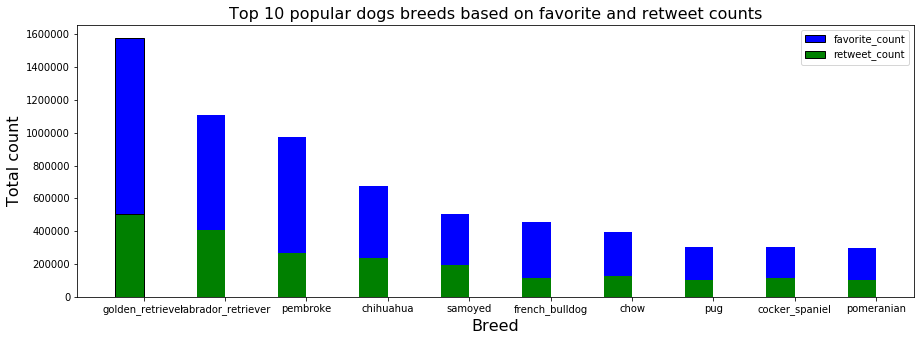

In [83]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

# create bar plot for the top 10 dog breeds
ind = np.arange(10) 
       
plt.bar(ind,top_10.favorite_count,0.35,color='blue',edgecolor='black',label='favorite_count')
plt.bar(ind,top_10.retweet_count,0.35,color='green',edgecolor='black', label='retweet_count')

plt.xlabel('Breed', fontsize=16)
plt.ylabel('Total count',fontsize=16)
plt.title('Top 10 popular dogs breeds based on favorite and retweet counts',fontsize=16)

plt.xticks(ind + 0.35 / 2, (top_10.p1))
plt.legend(loc='best')

# source: http://benalexkeen.com/bar-charts-in-matplotlib/

In [84]:
# group by breed and calculate the average of rating for each breed 
df8= df6.groupby('p1')['rating'].mean().reset_index()
 


In [85]:
# sort form the most popular to the least depending on average of rating
popular_breeds2=df8.sort_values( by= ['rating'],ascending=False)


In [86]:
# new data frame that contains the top 10 rows only according to average rating
top_10_rating= popular_breeds2[:10]


([<matplotlib.axis.XTick at 0x7f2bdbcad1d0>,
 <a list of 10 Text xticklabel objects>)

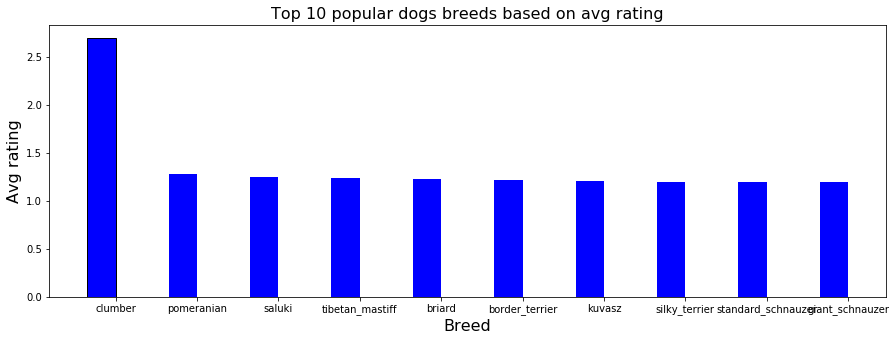

In [87]:
# create bar plot for the top 10 dog breeds  
ind = np.arange(10)
plt.bar(ind,top_10_rating.rating,0.35,color='blue',edgecolor='black')

plt.xlabel('Breed', fontsize=16)
plt.ylabel('Avg rating',fontsize=16)
plt.title('Top 10 popular dogs breeds based on avg rating',fontsize=16)
plt.xticks(ind + 0.35 / 2, (top_10_rating.p1))


The top 10 breeds based on rating is different from the top 10 based on retweets and favorite counts. The only breed that appears in both lists is pomeranian  

In [88]:
# the best dogs according to retweets count 
df5.sort_values(by=['retweet_count'],ascending=False)


,favorite_count,tweet_id,retweet_count,timestamp,source,text,expanded_urls,name,rating,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
841,163968,744234799360020481,83410,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,None,1.3,doggo,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
875,121137,739238157791694849,61761,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,None,1.3,doggo,...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
427,126801,807106840509214720,60815,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,Stephan,1.3,none,...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
325,140131,822872901745569793,47573,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,None,1.3,puppo,...,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
59,103818,879415818425184262,43318,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,Duddles,1.3,none,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
354,92010,819004803107983360,39970,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",Bo,1.4,doggo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
351,0,819015337530290176,39970,2017-01-11 02:57:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",Bo,1.4,doggo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
430,80217,806629075125202948,38136,2016-12-07 22:38:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Good afternoon class today we're going to learn what makes a good boy so good"" 13/1

In [89]:
# the best dogs according to favorite count 
df5.sort_values(by=['favorite_count'],ascending=False)

,favorite_count,tweet_id,retweet_count,timestamp,source,text,expanded_urls,name,rating,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
841,163968,744234799360020481,83410,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,None,1.3,doggo,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
325,140131,822872901745569793,47573,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,None,1.3,puppo,...,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
427,126801,807106840509214720,60815,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,Stephan,1.3,none,...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
111,121752,866450705531457537,35345,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",Jamesy,1.3,pupper,...,2,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
875,121137,739238157791694849,61761,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,None,1.3,doggo,...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
59,103818,879415818425184262,43318,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,Duddles,1.3,none,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
354,92010,819004803107983360,39970,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",Bo,1.4,doggo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
139,90536,859196978902773760,30686,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,quite,1.2,none,...,1,angora,0.224218,False,malamute,0.216163,True,persian_cat,0.128383,False
1488,82253,678399652199309312,33688,2015-12-20 02:20:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This made my

The dog that got the highest retweets count and favorite count is a doggo from labrador retriever breed 

In [90]:
# the best dog according to rating
df5.sort_values(by=['rating'],ascending=False)

,favorite_count,tweet_id,retweet_count,timestamp,source,text,expanded_urls,name,rating,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
792,5368,749981277374128128,2625,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,177.600000,none,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1782,24903,670842764863651840,8945,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,None,42.000000,none,...,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
551,19401,786709082849828864,6657,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,7.500000,none,...,1,pomeranian,0.467321,True,persian_cat,0.122978,False,chow,0.102654,True
411,5682,810984652412424192,1565,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,3.428571,none,...,1,golden_retriever,0.871342,True,tibetan_mastiff,0.036708,True,labrador_retriever,0.025823,True
607,6967,778027034220126208,1761,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,2.700000,pupper,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,lhasa,0.006519,True
1439,1792,680494726643068929,512,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,None,2.600000,none,...,1,kuvasz,0.438627,True,samoyed,0.111622,True,great_pyrenees,0.064061,True
226,0,838916489579200512,36,2017-03-07 00:57:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",None,1.500000,none,...,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
746,17360,755206590534418437,5799,2016-07-19 01:04:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,"https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1",one,1.400000,doggo,...,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,Fals

The dogs which got the first and second highest rating are from unknown breed. However, pomeranian & golden_retriever dogs got the third and fourth highest rating

In [91]:
# create a new dataframe for popular stage of each breed
popular_stage= df6.groupby(['p1','stage'])['favorite_count','retweet_count'].sum().reset_index()


In [96]:
# delete the rows where stage is unknown 
popular_stage=popular_stage.loc[(popular_stage['stage'] != 'none')]

In [97]:
# sort the values according to the highest favorite count
popular_stage=popular_stage.sort_values( by= ['favorite_count'],ascending=False)

In [98]:
# get the top 10 stage according to favorite count
popular_stage[:10]

,p1,stage,favorite_count,retweet_count
300,labrador_retriever,doggo,213219.0,93825.0
220,golden_retriever,doggo,178449.0,63750.0
203,french_bulldog,pupper,145654.0,39125.0
309,lakeland_terrier,puppo,140131.0,47573.0
190,eskimo_dog,doggo,121137.0,61761.0
223,golden_retriever,pupper,118061.0,35783.0
480,standard_poodle,doggo,92010.0,79940.0
303,labrador_retriever,pupper,84120.0,20933.0
393,pembroke,pupper,83445.0,35464.0
433,samoyed,pupper,61264.0,21045.0


As shown in the table above, doggo stage under labrador_retriever & golden_retriever got the highest favorite and retweet count.